# Keras tutorial
This tutorial is a modification from https://elitedatascience.com/keras-tutorial-deep-learning-in-python

In [42]:
import numpy as np
from keras.models import Sequential # linear stack of neural network layers
from keras.layers import Dense, Dropout, Activation, Flatten # layers to use
from keras.layers import Convolution2D, MaxPooling2D # CNN layers
from keras.utils import np_utils
from keras.utils import to_categorical
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.2 ms


## Loading Data

Loading MURA images

In [2]:
import utils # importing from our utils functions

time: 3.5 s


In [3]:
x_train, y_train, x_test, y_test = utils.read_mura_pickle()

INFO:utils.utils:loading data/MURA-v1.1/x_train.pkl
INFO:utils.utils:loading data/MURA-v1.1/y_train.pkl
INFO:utils.utils:loading data/MURA-v1.1/x_valid.pkl
INFO:utils.utils:loading data/MURA-v1.1/y_valid.pkl


time: 7.87 s


We can look at the shape of the dataset:

In [4]:
x_train.shape

(36808, 512, 512)

time: 6.69 ms


Visually inspect an image:

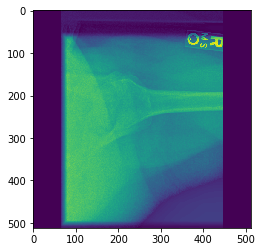

time: 217 ms


In [6]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(x_train[0])

## Data preparation

reshape the data from $512\times512$ to $512\times512\times1$ (1 for channel)

In [8]:
x_train = x_train.reshape(x_train.shape[0], 512, 512, 1)
x_test = x_test.reshape(x_test.shape[0], 512, 512, 1)

time: 2 ms


In [9]:
x_train.shape

(36808, 512, 512, 1)

time: 4.02 ms


Convert our data type to float32 and normalize our data values to the range [0, 1].

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

time: 16.1 s


We have a 0-1 target so it's naturally one-hot coded, just need to reshape it to have one column

In [13]:
y_train = y_train.reshape(y_train.shape[0], 1)

time: 1.56 ms


In [14]:
y_train.shape

(36808, 1)

time: 3.65 ms


## Define model architecture

In [33]:
# declare sequential model
model = Sequential() 

time: 1.56 ms


In [34]:
# CNN input layer 
# the defaults for strides is (1,1) but it's always good to be explicit
model.add(Convolution2D(filters=32, kernel_size=(3, 3), strides=(1,1), activation='relu', input_shape=(512, 512, 1)))

time: 33.6 ms


We can check the shape of our model output after adding this layer

In [35]:
model.output_shape

(None, 510, 510, 32)

time: 3.96 ms


And we can just keep adding layers like we are building legos

In [36]:
model.add(Convolution2D(filters=32, kernel_size=(3, 3), strides=(1,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

time: 62.2 ms


MaxPooling2D is a way to reduce the number of parameters in our model by sliding a 2x2 pooling filter across the previous layer and taking the max of the 4 values in the 2x2 filter.

Dropout is used to prevent overfitting - read more about it [here](https://www.quora.com/How-does-the-dropout-method-work-in-deep-learning-And-why-is-it-claimed-to-be-an-effective-trick-to-improve-your-network)

In [37]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

time: 60.3 ms


## Compile model

We still need to define the loss and optimization method. Keras has a variety of [loss functions](https://keras.io/losses/) and out-of-the-box [optimizers](https://keras.io/optimizers/) to choose from. For this tutorial we'll use cross-entropy as loss function and [Adam](https://arxiv.org/abs/1412.6980) as our optimizer.

In [48]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

time: 75.7 ms


## Fitting the model

In [50]:
model.fit(x_train, y_train, 
          batch_size=8, nb_epoch=10, verbose=1)

/home/rluo/anaconda3/envs/mura/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/10
36808/36808 [==============================] - 1296s 35ms/step - loss: 6.5112 - acc: 0.5959
Epoch 2/10
36808/36808 [==============================] - 1316s 36ms/step - loss: 6.5127 - acc: 0.5959
Epoch 3/10
36808/36808 [==============================] - 1301s 35ms/step - loss: 6.5128 - acc: 0.5959
Epoch 4/10
36808/36808 [==============================] - 1319s 36ms/step - loss: 6.5128 - acc: 0.5959
Epoch 5/10
36808/36808 [==============================] - 1314s 36ms/step - loss: 6.5128 - acc: 0.5959
Epoch 6/10
36808/36808 [==============================] - 1331s 36ms/step - loss: 6.5128 - acc: 0.5959
Epoch 7/10
36808/36808 [==============================] - 1313s 36ms/step - loss: 6.5128 - acc: 0.5959
Epoch 8/10
36808/36808 [==============================] - 1290s 35ms/step - loss: 6.5128 - acc: 0.5959
Epoch 9/10
36808/36808 [==============================] - 1310s 36ms/step - loss: 6.5124 - acc: 0.5960
Epoch 10/10
36808/36808 [==============================] - 1301s 35ms/ste

time: 3h 38min 10s


We can check how loss and accuracy change over epochs

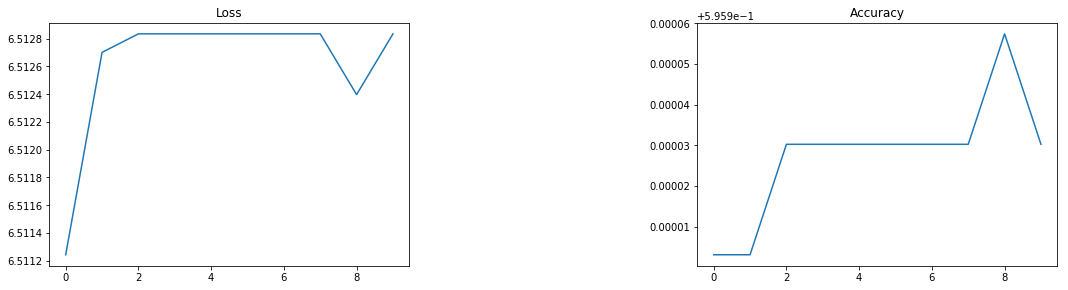

time: 319 ms


In [51]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(model.history.history['loss'])
plt.title('Loss')
plt.subplot(122)
plt.plot(model.history.history['acc'])
plt.title('Accuracy')
plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)
plt.show()

## Evaluating our model on the test set

### Loss and Accuracy

In [52]:
score = model.evaluate(x_test, y_test, verbose=0)

time: 16.8 s


In [53]:
score

[7.713695987482474, 0.5214263371911166]

time: 3.78 ms


An accuracy around the sample class proportion means that our model is basically predicting at random or one value for all clases. We need a more powerful model.